Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [2]:
import pandas as pd
d1 = pd.read_csv(r'C:\Users\zarah\Desktop\Lighthouse Labs\Week3_EDA\Statistical-Modelling-Project\returned_yelp.csv')
d2 = pd.read_csv(r'C:\Users\zarah\Desktop\Lighthouse Labs\Week3_EDA\Statistical-Modelling-Project\returned_foursq1.csv')
d3 = pd.read_csv(r'C:\Users\zarah\Desktop\Lighthouse Labs\Week3_EDA\Statistical-Modelling-Project\citybikes.csv')


In [ ]:
merge1 = pd.merge(d1, d2, how='outer')
print(merge1)

In [5]:
merge1.to_csv(r'C:\Users\zarah\Desktop\Lighthouse Labs\Week3_EDA\Statistical-Modelling-Project\merge1a.csv', index=False, header=True)

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [6]:
#Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print(merge1.shape)
merge1.dtypes

In [ ]:
#Checking for duplicate Restaurant name records
nameUnique = len(set(merge1.name))
print(nameUnique)
nameTotal = merge1.shape[0]
print(nameTotal)
namedupe = nameTotal - nameUnique
print(namedupe)


# drop id col --> Removing the duplicate records
uniq_merge1 = merge1.drop_duplicates(subset='name',keep ='first',inplace=False)

In [ ]:
print(uniq_merge1)

In [10]:
uniq_merge1.to_csv(r'C:\Users\zarah\Desktop\Lighthouse Labs\Week3_EDA\Statistical-Modelling-Project\uniq_merge1.csv', index=False, header=True)

VISUALTIZATION - HISTOGRAM

<AxesSubplot:xlabel='rating', ylabel='Count'>

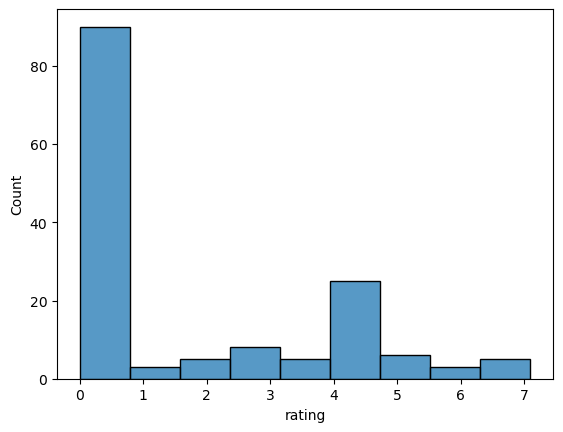

In [11]:
# Histogram of UNIQUE MERGED data
sns.histplot(uniq_merge1['rating'])

<AxesSubplot:xlabel='rating', ylabel='Count'>

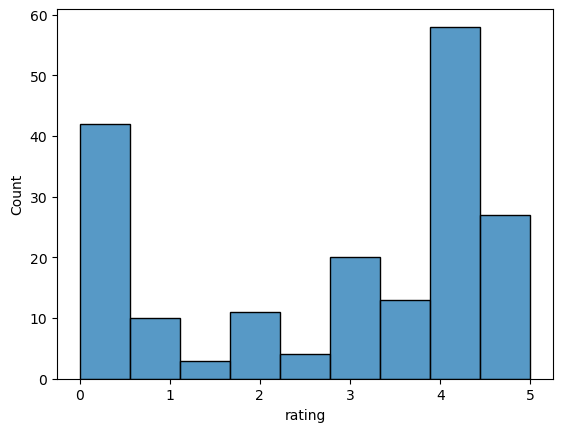

In [12]:
#Histogram of YELP DATA
sns.histplot(d1['rating'])


<AxesSubplot:xlabel='rating', ylabel='Count'>

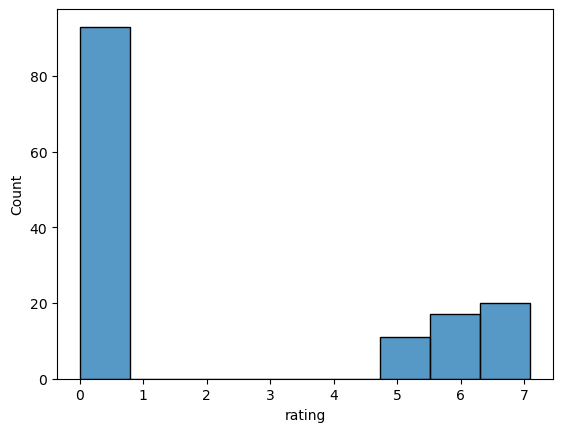

In [13]:
#Histogram of FOURSQUARE DATA
sns.histplot(d2['rating'])

VISUALIZATION - SCATTER PLOT

<AxesSubplot:xlabel='rating', ylabel='station'>

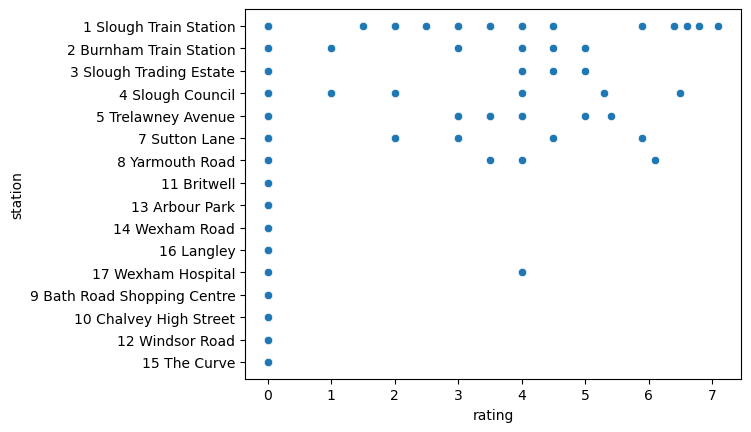

In [14]:
# Scatterplot of UNIQUE MERGED Data
sns.scatterplot(data=uniq_merge1,x='rating', y='station')


<AxesSubplot:xlabel='rating', ylabel='station'>

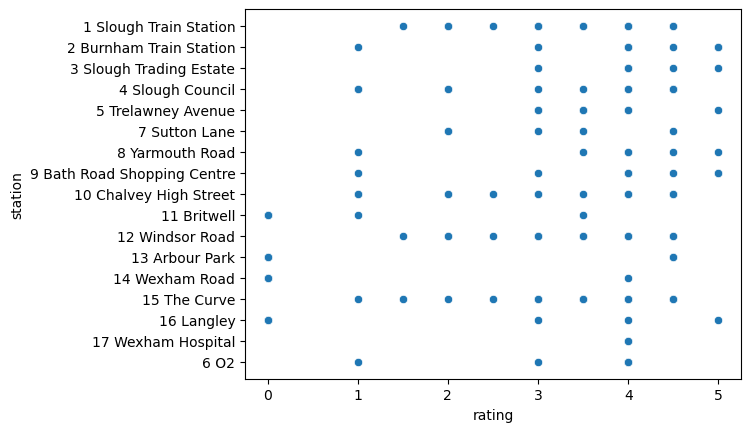

In [15]:
# Scatterplot of YELP Data  ONLY
sns.scatterplot(data=d1,x='rating', y='station')


<AxesSubplot:xlabel='rating', ylabel='station'>

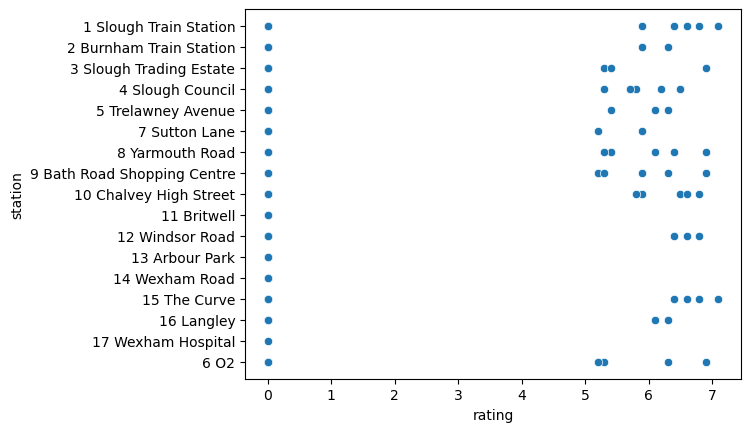

In [16]:
# Scatterplot of FOURSQUARE Data  ONLY
sns.scatterplot(data=d2,x='rating', y='station')

                               rating
station                              
1 Slough Train Station       3.393333
10 Chalvey High Street       0.000000
11 Britwell                  0.000000
12 Windsor Road              0.000000
13 Arbour Park               0.000000
14 Wexham Road               0.000000
15 The Curve                 0.000000
16 Langley                   0.000000
17 Wexham Hospital           2.666667
2 Burnham Train Station      2.033333
3 Slough Trading Estate      1.590909
4 Slough Council             1.880000
5 Trelawney Avenue           2.415385
7 Sutton Lane                2.175000
8 Yarmouth Road              2.720000
9 Bath Road Shopping Centre  0.000000


<AxesSubplot:xlabel='rating', ylabel='station'>

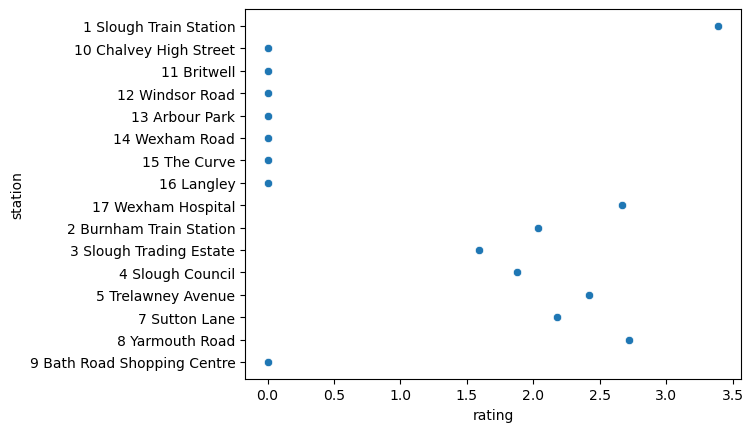

In [17]:
# Scatterplot of the average rating across each station
avg_rating = uniq_merge1.groupby('station')['rating'].mean()

scatter_df = pd.DataFrame(avg_rating)

print(scatter_df)

sns.scatterplot(data=scatter_df, x="rating", y="station")

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [24]:
import sqlite3
from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

connection = create_connection("SMP_db.sqlite3")

Connection to SQLite DB successful


In [26]:
# write the data to a sqlite table
uniq_merge1.to_sql('uniq_merge1', connection, if_exists='append', index = False)
d1.to_sql('yelp', connection, if_exists='append', index = False)
d2.to_sql('foursquare', connection, if_exists='append', index = False)
d3.to_sql('citybikes', connection, if_exists='append', index = False)


17

Look at the data before and after the join to validate your data.

SQLlite DB
1. Table 'yelp' has all the records from the yelp api 
2. Table 'foursquare' has all the records from the foursquare api 
3. Table 'citybikes' has all the records from the citybikes api
4. Table 'uniq_merge1' has all the UNIQUE records from yelp and foursquare tables combined. One this to note here is that the ratings between yelp and foursquare follow different scale.